# Definicion Y concepto de truncamiento en Distribuciones
El **truncamiento** de una distribución consiste en restringir su dominio a un intervalo específico, $[a, b]$, de modo que sólo se consideren los valores de la variable aleatoria que se encuentren en ese rango, descartando todos los demás valores fuera de él.

## ¿En qué consiste el truncamiento?

Cuando truncamos una distribución, hacemos lo siguiente:

1. **Selección del intervalo:**  
   Se define un intervalo $[a, b]$ donde la distribución es considerada. Los valores de la variable que se encuentren fuera de este rango se eliminan.

2. **Re-normalización:**  
   Debido a que se han eliminado algunas partes de la distribución original, la función de densidad debe ser ajustada para que la probabilidad total en el intervalo $[a, b]$ sea igual a 1. Esto se logra dividiendo la densidad original por la probabilidad acumulada en el intervalo, es decir, $( F(b) - F(a) )$.

## Formulas del truncamiento

Si la distribución original tiene una función de densidad $( f(x) )$ y una función de distribución acumulada $( F(x) )$, la función de densidad truncada se define como:

$$
f_{\text{trunc}}(x) = \begin{cases}
\frac{f(x)}{F(b) - F(a)} & \text{si } a \leq x \leq b, \\
0 & \text{en otro caso.}
\end{cases}
$$

y la función de distribución acumulada truncada es:

$$
F^*(x) = \begin{cases}
0 & \text{si } x < a, \\
\frac{F(x) - F(a)}{F(b) - F(a)} & \text{si } a \leq x \leq b, \\
1 & \text{si } x > b.
\end{cases}
$$

## ¿Por qué utilizar el truncamiento?

- **Limitaciones físicas o de observación:**  
  En muchos casos, la variable de interés sólo puede tomar valores dentro de un rango específico.  
- **Eliminación de colas extremas:**  
  Puede ser útil para evitar el efecto de colas muy largas o valores atípicos en el análisis.
- **Mejora en el modelado:**  
  Al concentrarse en el rango de interés, se pueden obtener modelos más precisos para ciertos fenómenos.

  A continuacion se hare un ejercicio con distribucion normal truncada.

## Librerías

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

## Parámetros y funciones de la distribución normal

In [72]:
mu = 12
sigma = 2

# Rango para graficar la distribución normal completa
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) # 4 desviaciones estándar a cada lado de la media
pdf = norm.pdf(x, mu, sigma) # Función de densidad de probabilidad
cdf = norm.cdf(x, mu, sigma) # Función de distribución acumulada

## Graficar PDF y CDF de la normal

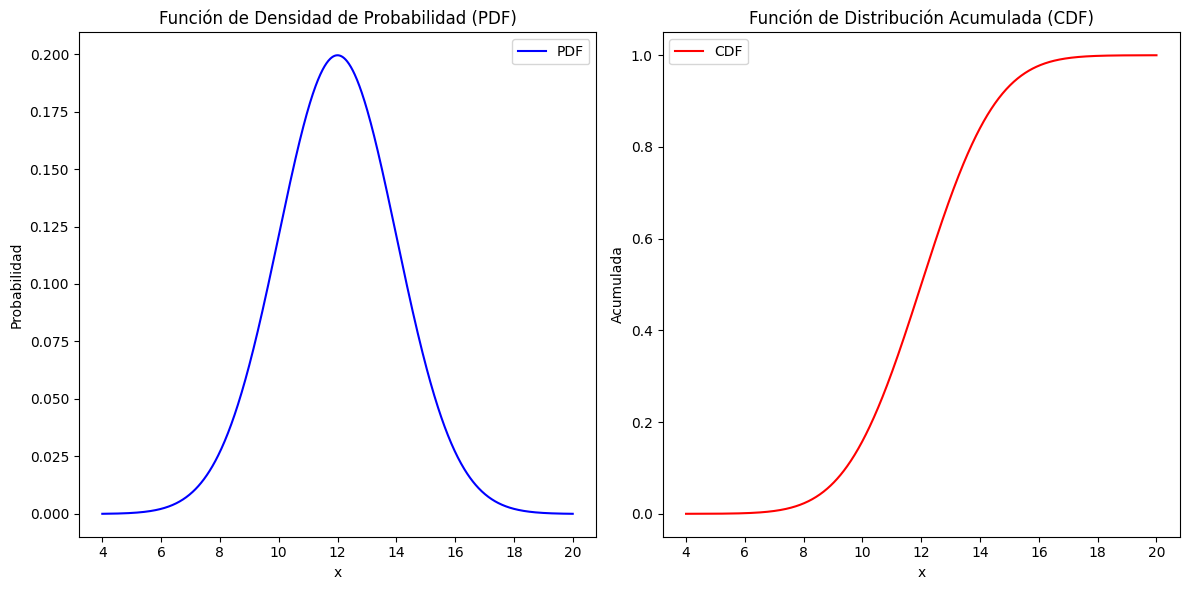

In [73]:
plt.figure(figsize=(12, 6)) # Tamaño de la figura en pulgadas

plt.subplot(1, 2, 1) # Subgráfica 1x2, primera subgráfica
plt.plot(x, pdf, label="PDF", color='blue')
plt.title("Función de Densidad de Probabilidad (PDF)")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="CDF", color='red')
plt.title("Función de Distribución Acumulada (CDF)")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()

## Truncamiento con valores absolutos

En este caso, para hacer el truncamiento utilizamos la función `truncnorm` de **Scipy** que recibe como parámetros los límites del truncamiento **estandarizados**, la media y la desviación estandar.

In [74]:
# --- Distribución truncada ---
# Definimos los límites de truncamiento (modificalos según lo que necesites)
a, b = 6, 16

# Para truncnorm, los parámetros a y b deben estar estandarizados: (limite - mu) / sigma
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma
print(f"Límites estandarizados: a={a_std}, b={b_std}")

# Creamos la distribución normal truncada
trunc_dist = truncnorm(a_std, b_std, loc=mu, scale=sigma) # loc=mu (media), scale=sigma (desviación estándar) son los parámetros de la normal
print(trunc_dist.mean(), trunc_dist.std())

# Valores para la gráfica en el rango truncado
x_trunc = np.linspace(a, b, 1000)
pdf_trunc = trunc_dist.pdf(x_trunc)
cdf_trunc = trunc_dist.cdf(x_trunc)

Límites estandarizados: a=-3.0, b=2.0
11.898434020650242 1.868848458249524


## Graficar PDF y CDF de la normal truncada

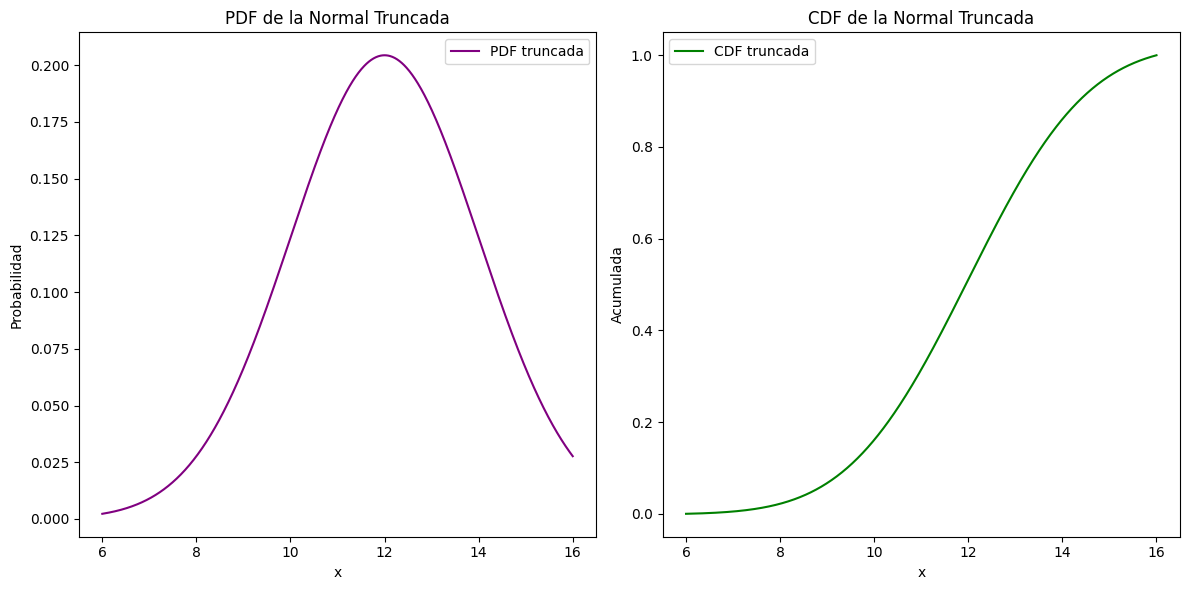

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_trunc, pdf_trunc, label="PDF truncada", color='purple')
plt.title("PDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_trunc, cdf_trunc, label="CDF truncada", color='green')
plt.title("CDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()


## Calculos de probabilidad

In [76]:
# Calcular probabilidad de que x esté entre 0.5 y 1 para la distribución normal completa
p_normal = norm.cdf(12, mu, sigma) - norm.cdf(11, mu, sigma)
print("Probabilidad en la distribución normal entre 0 y 1:", p_normal)

# Calcular probabilidad de que x esté entre 0.5 y 1 para la distribución truncada
p_trunc = trunc_dist.cdf(12) - trunc_dist.cdf(11)
print("Probabilidad en la distribución truncada entre 0 y 1:", p_trunc)


Probabilidad en la distribución normal entre 0 y 1: 0.19146246127401312
Probabilidad en la distribución truncada entre 0 y 1: 0.19619066211268765


## Truncamiento con Desviaciones estándar

Si se tiene una distribución normal con media $\mu = 12$ y desviación estándar $\sigma = 2$, es posible determinar los valores correspondientes a cada intervalo de desviación estándar mediante la suma y resta de múltiplos de σ a la media. Estos valores representan los límites dentro de los cuales se encuentra un determinado porcentaje de los datos en una distribución normal.

Matemáticamente, los intervalos de una, dos, tres y cuatro desviaciones estándar se calculan de la siguiente manera:
$$
\begin{aligned}
1\sigma &\rightarrow [\mu - \sigma, \mu + \sigma] = [12 - 2, 12 + 2] = [10, 14] \\
2\sigma &\rightarrow [\mu - 2\sigma, \mu + 2\sigma] = [12 - 4, 12 + 4] = [8, 16] \\
3\sigma &\rightarrow [\mu - 3\sigma, \mu + 3\sigma] = [12 - 6, 12 + 6] = [6, 18] \\
4\sigma &\rightarrow [\mu - 4\sigma, \mu + 4\sigma] = [12 - 8, 12 + 8] = [4, 20]
\end{aligned}
$$

Estos intervalos permiten analizar la dispersión de los datos y determinar la probabilidad de que una observación se encuentre dentro de un determinado rango. En una distribución normal, aproximadamente el $68.27\%$ de los datos se encuentra dentro de $±1σ$, el $95.45\%$ dentro de ±2σ, el $99.73\%$ dentro de $±3σ$, y el $99.99\%$ dentro de $±4σ$.

In [77]:
# Calculamos las desviaciones estándar
def calc_desv_estandar(x, mu = mu, sigma = sigma):
    a = (mu - sigma*x)
    b = (mu + sigma*x)
    return a, b

# --- Distribución truncada con el rango de la primera desviación estándar ---
a, b = calc_desv_estandar(1)

# Para truncnorm, los parámetros a y b deben estar estandarizados: (limite - mu) / sigma
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma
print(f"Límites estandarizados: a={a_std}, b={b_std}")

# Creamos la distribución normal truncada
trunc_dist = truncnorm(a_std, b_std, loc=mu, scale=sigma) # loc=mu (media), scale=sigma (desviación estándar) son los parámetros de la normal
print(trunc_dist.mean(), trunc_dist.std())

# Valores para la gráfica en el rango truncado
x_trunc = np.linspace(a, b, 1000)
pdf_trunc = trunc_dist.pdf(x_trunc)
cdf_trunc = trunc_dist.cdf(x_trunc)
   

Límites estandarizados: a=-1.0, b=1.0
12.0 1.0791201875097935


## Graficar PDF y CDF de la normal truncada

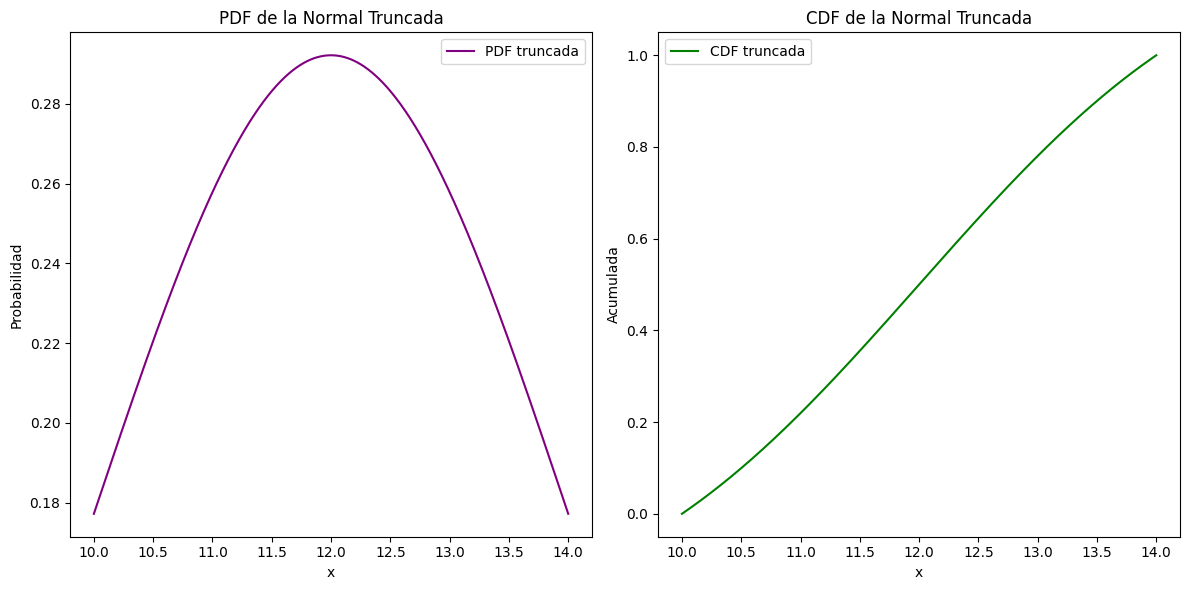

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_trunc, pdf_trunc, label="PDF truncada", color='purple')
plt.title("PDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_trunc, cdf_trunc, label="CDF truncada", color='green')
plt.title("CDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()


## Calculos de probabilidad

In [79]:
# Calcular probabilidad de que x esté entre 11 y 12 para la distribución normal completa
p_normal = norm.cdf(12, mu, sigma) - norm.cdf(11, mu, sigma)
print("Probabilidad en la distribución normal entre 0 y 1:", p_normal)

# Calcular probabilidad de que x esté entre 11 y 12 para la distribución truncada
p_trunc = trunc_dist.cdf(12) - trunc_dist.cdf(11)
print("Probabilidad en la distribución truncada entre 0 y 1:", p_trunc)


Probabilidad en la distribución normal entre 0 y 1: 0.19146246127401312
Probabilidad en la distribución truncada entre 0 y 1: 0.2804532125940018


## Truncamiento con percentiles

En este caso, para hacer el truncamiento utilizamos la función `truncnorm` de **Scipy** que recibe como parámetros los límites del truncamiento **estandarizados**, la media y la desviación estandar.

In [ ]:
# Calcular percentil 10 y percentil 95
def calc_percentil(per, mu = mu, sigma = sigma):
    return norm.ppf(per, loc=mu, scale=sigma)


# --- Distribución truncada con el rango de la primera desviación estándar ---
a = calc_percentil(0.1)
b = calc_percentil(0.7)

# Para truncnorm, los parámetros a y b deben estar estandarizados: (limite - mu) / sigma
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma
print(f"Límites estandarizados: a={a_std}, b={b_std}")

# Creamos la distribución normal truncada
trunc_dist = truncnorm(a_std, b_std, loc=mu, scale=sigma) # loc=mu (media), scale=sigma (desviación estándar) son los parámetros de la normal
print(trunc_dist.mean(), trunc_dist.std())

# Valores para la gráfica en el rango truncado
x_trunc = np.linspace(a, b, 1000)
pdf_trunc = trunc_dist.pdf(x_trunc)
cdf_trunc = trunc_dist.cdf(x_trunc)

9.4368968689108 13.048801025416081
Límites estandarizados: a=-1.2815515655446, b=0.5244005127080404
11.426019059108043 0.9775531860519759


## Graficar PDF y CDF de la normal truncada

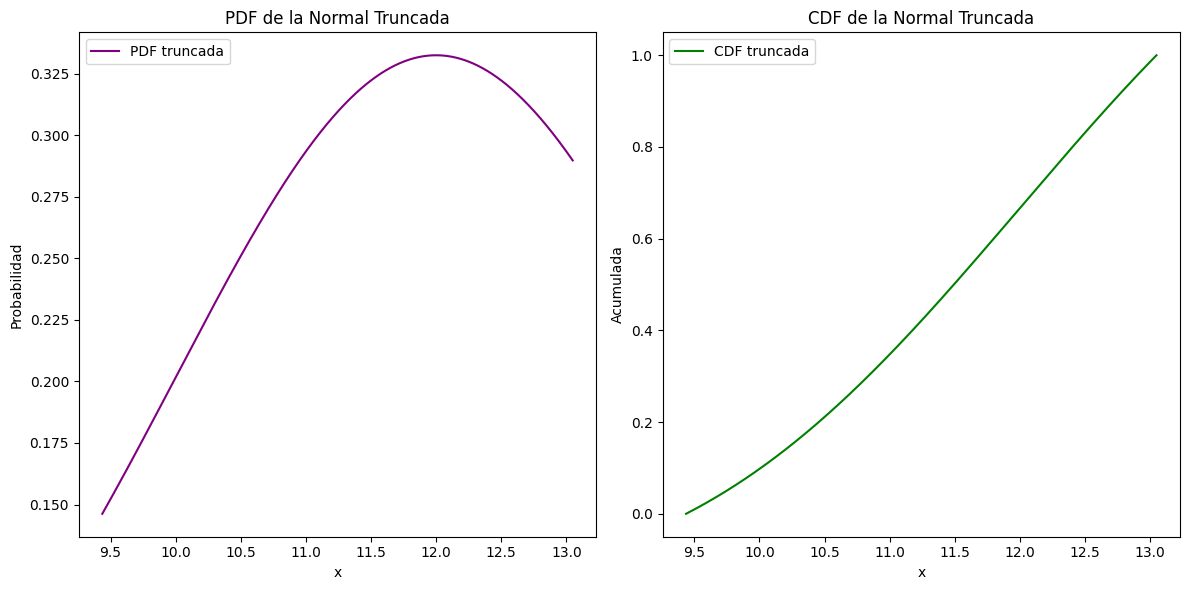

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_trunc, pdf_trunc, label="PDF truncada", color='purple')
plt.title("PDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_trunc, cdf_trunc, label="CDF truncada", color='green')
plt.title("CDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()

## Calculos de probabilidad

In [82]:
# Calcular probabilidad de que x esté entre 11 y 12 para la distribución normal completa
p_normal = norm.cdf(12, mu, sigma) - norm.cdf(11, mu, sigma)
print("Probabilidad en la distribución normal entre 0 y 1:", p_normal)

# Calcular probabilidad de que x esté entre 11 y 12 para la distribución truncada
p_trunc = trunc_dist.cdf(12) - trunc_dist.cdf(11)
print("Probabilidad en la distribución truncada entre 0 y 1:", p_trunc)


Probabilidad en la distribución normal entre 0 y 1: 0.19146246127401312
Probabilidad en la distribución truncada entre 0 y 1: 0.3191041021233553
